Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1200x800 with 0 Axes>

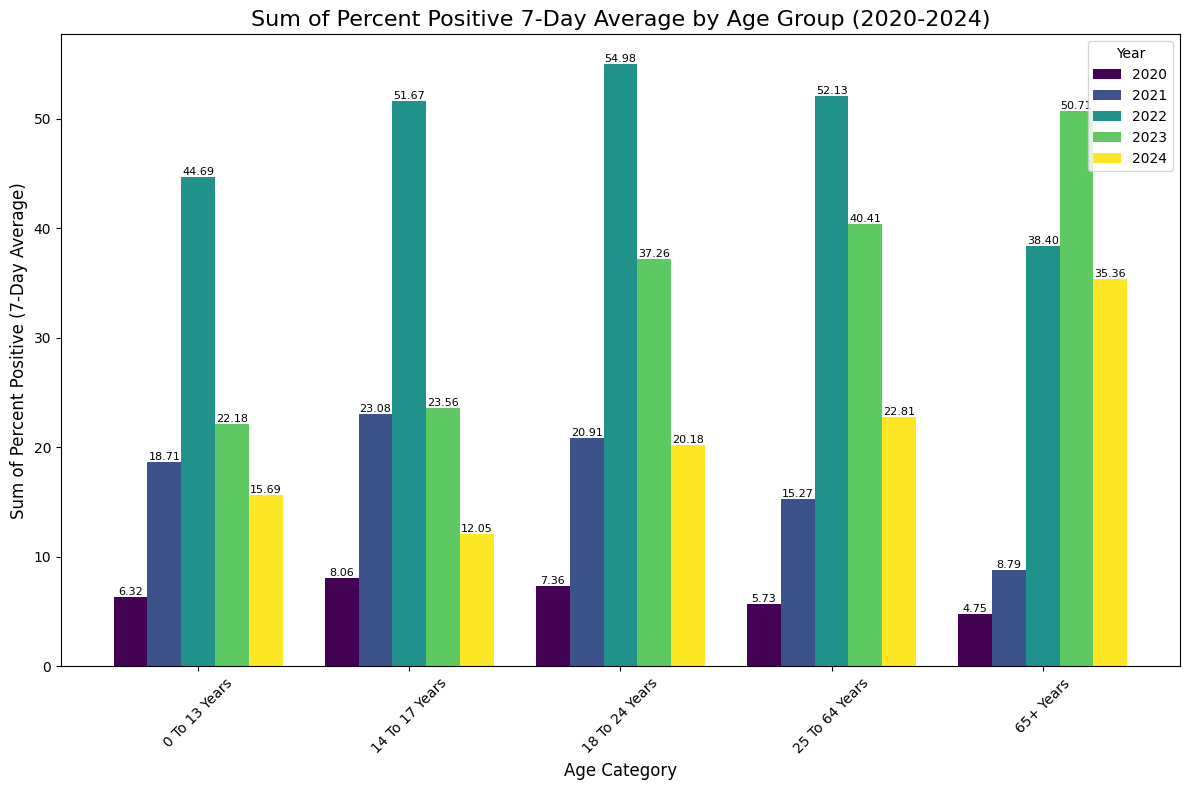

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/ontario-covid-19-testing-percent-positive-by-age-group.csv'
data = pd.read_csv(file_path)

# Convert DATE column to datetime and extract the year
data['DATE'] = pd.to_datetime(data['DATE'])
data['Year'] = data['DATE'].dt.year

# Rename age categories for readability
age_group_mapping = {
    "0to13": "0 To 13 Years",
    "14to17": "14 To 17 Years",
    "18to24": "18 To 24 Years",
    "25to64": "25 To 64 Years",
    "65+": "65+ Years"
}
data['age_category'] = data['age_category'].replace(age_group_mapping)

# Summarize data: sum percent_positive_7d_avg by year and age category
summary = data.groupby(['Year', 'age_category'])['percent_positive_7d_avg'].sum().reset_index()

# Filter for the years of interest (2020-2024)
years_of_interest = [2020, 2021, 2022, 2023, 2024]
filtered_summary = summary[summary['Year'].isin(years_of_interest)]

# Prepare data for visualization
pivot_table = filtered_summary.pivot(index='age_category', columns='Year', values='percent_positive_7d_avg').fillna(0)

# Create the bar plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', width=0.8, figsize=(12, 8), colormap='viridis')

# Labeling
plt.title("Sum of Percent Positive 7-Day Average by Age Group (2020-2024)", fontsize=16)
plt.ylabel("Sum of Percent Positive (7-Day Average)", fontsize=12)
plt.xlabel("Age Category", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Year", fontsize=10, loc="upper right")

# Add labels on top of the bars
for i, bar_group in enumerate(plt.gca().containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

# Adjust for better spacing
plt.tight_layout()
plt.show()
